In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans


# Our functions import

In [2]:
from generate_population_scripts import (generate_population,
                                         evaluate_distance_fitness, 
                                         evaluate_fitness_customers_count,
                                         evaluate_fitness_customers_served_demands,
                                         evaluate_fitness_vehicle_count,
                                         find_depot_using,
                                         get_evalution_count, 
                                         set_evaluation_count)
from combination import cut_and_crossfill, mutation_inverse, mutation_scramble
from selection import roulette_wheel, binary_tournament

In [3]:
def algorithm_run(pop_count, dataset, depot_location_dict, vehicle_count, selection_method, FITNESS_FUNCTION, MUTATION_METHOD, RECOMBINATION_METHOD, max_capacity=None, max_distance=None, p_m=0.1, p_c =0.9 ,max_evaluations = 5000, vehicle_depot_constraint=True):
    """
    one constraint should be always given as input, the maximum capacity or maximum distance
    """
    ## reset the evaluation counts
    set_evaluation_count(0)

    population, fitness_pop = generate_population(max_capacity=max_capacity,
                                                     max_distance=max_distance,
                                                     depot_location_dict= depot_location_dict,
                                                     dataset=dataset, 
                                                     pop_count= pop_count,
                                                     vehicle_count= vehicle_count, 
                                                     fitness_function = FITNESS_FUNCTION, 
                                                     vehicle_depot_constraint = vehicle_depot_constraint)
    generation_count = 0

    best_chromosome = None
    best_chromsome_fitness = None

    while get_evalution_count() < max_evaluations:
        print(f'Generation Count: {generation_count}, Evaluations number: {get_evalution_count()}')
        ## create pair of the parents
        parent_pairs = []
        for _ in range(pop_count):
            pair = selection_method(population, fitness_pop)
            parent_pairs.append(pair)

        
        offsprings = []
        fitness_offsprings = []
        for parents in parent_pairs:
            recombination_p = np.random.random()

            ## the offspring for this iteration
            iteration_offspring = []
            
            ######## Recombination ########
            if recombination_p < p_c:
                offspring1, offspring2 =  RECOMBINATION_METHOD(parents[0], parents[1], dataset, max_capacity, max_distance, depot_location_dict, vehicle_depot_constraint)

                iteration_offspring = [offspring1, offspring2]

            
            ######## Mutation ########
            mutation_p = np.random.random()

            ## if cross over has happend
            if len(iteration_offspring) != 0 and mutation_p < p_m:
                offspring1 = MUTATION_METHOD(iteration_offspring[0], max_capacity, dataset, depot_location_dict, max_distance, vehicle_depot_constraint)
                offspring2 = MUTATION_METHOD(iteration_offspring[1], max_capacity, dataset, depot_location_dict, max_distance, vehicle_depot_constraint)

                iteration_offspring = [offspring1, offspring2]
            ## if cross over had not happened
            elif mutation_p < p_m:
                offspring1 = MUTATION_METHOD(parents[0], max_capacity, dataset, depot_location_dict, max_distance, vehicle_depot_constraint)
                offspring2 = MUTATION_METHOD(parents[1], max_capacity, dataset, depot_location_dict, max_distance, vehicle_depot_constraint)

                iteration_offspring = [offspring1, offspring2]
            ## if both cross over and mutation has not happened!
            else:
                iteration_offspring = [parents[0], parents[1]]
            
            ## finally append the genarated offsprings to offspring array 
            offsprings.append(iteration_offspring[0])
            offsprings.append(iteration_offspring[1])
            
            depot_symbol = find_depot_using(iteration_offspring[0], list(depot_location_dict.keys()))
            fitness_offsprings.append(FITNESS_FUNCTION(iteration_offspring[0], depot_location_dict[depot_symbol], dataset, depot_symbol))
            depot_symbol = find_depot_using(iteration_offspring[1], list(depot_location_dict.keys()))
            fitness_offsprings.append(FITNESS_FUNCTION(iteration_offspring[1], depot_location_dict[depot_symbol], dataset, depot_symbol))

        ## replace the old population with the new ones

        ## the whole generation: parents + offsprings
        generation_population = population.copy()
        generation_population.extend(offsprings)

        ## whole generation fitness: parents fitness + offsprings fitness
        generation_fitness = fitness_pop.copy()
        generation_fitness.extend(fitness_offsprings)

        ## the sorted generation
        generation_population_sorted = np.array(generation_population)[np.argsort(generation_fitness)]
        generation_fitness_sorted = np.sort(generation_fitness)

        ## Step 10
        ## extract the best of the new generation
        best_of_generation_population = generation_population_sorted[:pop_count]
        best_of_generation_fitness = generation_fitness_sorted[:pop_count]

        best_chromosome = generation_population_sorted[0]
        best_chromsome_fitness = generation_fitness_sorted[0]
        
        ## save them into the original population arrays
        population = best_of_generation_population.tolist()
        fitness_pop = best_of_generation_fitness.tolist()
        

        ## increase the generation value
        generation_count += 1
    
    return best_chromosome, best_chromsome_fitness

# PROBLEM No. 1
The goal is to minimize the distance gone, of the vehicles with the parameters below
- There is 1 depot in the location `(-14, 9)`
- There are `6` vehicles
- Maximum Capacity is `70`
- The locations of the customers and their demands are in `P1.txt` file
- The distance each vehicle can go is not limited.

In [4]:
p1_data = pd.read_csv('data/P1.txt', delimiter=' ')
DEPOT_LOCATION = (-14, 9)

In [5]:
problem1_best_chromsome, problem1_best_chromsome_fitness = algorithm_run(pop_count = 50, 
                dataset=p1_data,
                depot_location_dict= {'(1)': DEPOT_LOCATION},
                max_capacity=70, 
                vehicle_count=6, 
                max_distance=None,
                selection_method=binary_tournament,
                FITNESS_FUNCTION=evaluate_distance_fitness,
                MUTATION_METHOD=mutation_scramble,
                RECOMBINATION_METHOD=cut_and_crossfill,
                max_evaluations=5000)

problem1_best_chromsome, problem1_best_chromsome_fitness

Generation Count: 0, Evaluations number: 50
Generation Count: 1, Evaluations number: 150
Generation Count: 2, Evaluations number: 250
Generation Count: 3, Evaluations number: 350
Generation Count: 4, Evaluations number: 450
Generation Count: 5, Evaluations number: 550
Generation Count: 6, Evaluations number: 650
Generation Count: 7, Evaluations number: 750
Generation Count: 8, Evaluations number: 850
Generation Count: 9, Evaluations number: 950
Generation Count: 10, Evaluations number: 1050
Generation Count: 11, Evaluations number: 1150
Generation Count: 12, Evaluations number: 1250
Generation Count: 13, Evaluations number: 1350
Generation Count: 14, Evaluations number: 1450
Generation Count: 15, Evaluations number: 1550
Generation Count: 16, Evaluations number: 1650
Generation Count: 17, Evaluations number: 1750
Generation Count: 18, Evaluations number: 1850
Generation Count: 19, Evaluations number: 1950
Generation Count: 20, Evaluations number: 2050
Generation Count: 21, Evaluations 

('(1)106139196128130123(1)|(1)159157113170146185(1)|(1)118119155161(1)|(1)151116102138152(1)147144156200148172(1)|(1)137131143126198183(1)|(1)162103141184163(1)|(1)171188166107177132160(1)|(1)180112117101197(1)|(1)124122182167191(1)|(1)134150110115129(1)|(1)181187165127108168(1)|(1)193142114104178(1)149169176(1)|(1)135105190179189(1)|(1)154136158195175(1)|(1)120174125192186(1)|(1)145164173199121(1)|(1)194133153111140109(1)',
 6478)

In [12]:
import matplotlib.pyplot as plt


In [21]:
DEPOT_LOCATION

(-14, 9)

[]

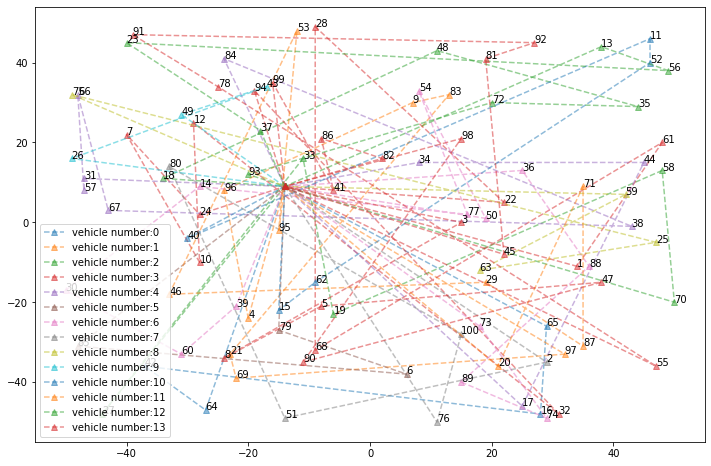

In [48]:
plt.figure(figsize=(12,8))
for vehicle_number, vehicle in enumerate(UU.split('|')):
    locations_x_served = []
    locations_y_served = []
    for idx in range(3, len(vehicle) + 1, 3):
        symbol = vehicle[idx-3: idx]
        if symbol == '(1)':
            locations_x_served.append(DEPOT_LOCATION[0])
            locations_y_served.append(DEPOT_LOCATION[1])
        else:
            customer_num = (int(symbol) - 100)
            customer = p1_data[p1_data.number == customer_num]
            loc_x, loc_y = customer.x.values[0], customer.y.values[0]
            locations_x_served.append(loc_x)
            locations_y_served.append(loc_y)
            plt.text(loc_x, loc_y, s=f'{customer_num}')
    plt.plot(locations_x_served, locations_y_served, label=f'vehicle number:{vehicle_number}', marker='^', linestyle='--', alpha=0.5)


plt.legend()
plt.plot()

# Problem No. 2
The goal is to maximize the customers recieved service with parametes below
- There is 1 depot in the location `(0, 13)`
- There are `4` vehicles
- Maximum distace each vehicle can go is `200` Km
- The locations of the customers and their demands are in `P2.txt` file
- The capacity is not limited for vehicles

In [4]:
p2_data = pd.read_csv('data/P2.txt', delimiter=' ')
DEPOT_LOCATION = (0, 13)

In [5]:
problem2_best_chromsome, problem2_best_chromsome_fitness = algorithm_run(pop_count = 50, 
                dataset=p2_data,
                depot_location_dict= {'(1)': DEPOT_LOCATION},
#                 depot_symbol='(1)',
                max_capacity=None, 
                max_distance=200,
                vehicle_count=4, 
                selection_method=binary_tournament,
                FITNESS_FUNCTION=evaluate_fitness_customers_count,
                MUTATION_METHOD=mutation_scramble,
                RECOMBINATION_METHOD=cut_and_crossfill,
                max_evaluations=5000)

problem2_best_chromsome, problem2_best_chromsome_fitness

Generation Count: 0, Evaluations number: 50
Generation Count: 1, Evaluations number: 150
Generation Count: 2, Evaluations number: 250
Generation Count: 3, Evaluations number: 350
Generation Count: 4, Evaluations number: 450
Generation Count: 5, Evaluations number: 550
Generation Count: 6, Evaluations number: 650
Generation Count: 7, Evaluations number: 750
Generation Count: 8, Evaluations number: 850
Generation Count: 9, Evaluations number: 950
Generation Count: 10, Evaluations number: 1050
Generation Count: 11, Evaluations number: 1150
Generation Count: 12, Evaluations number: 1250
Generation Count: 13, Evaluations number: 1350
Generation Count: 14, Evaluations number: 1450
Generation Count: 15, Evaluations number: 1550
Generation Count: 16, Evaluations number: 1650
Generation Count: 17, Evaluations number: 1750
Generation Count: 18, Evaluations number: 1850
Generation Count: 19, Evaluations number: 1950
Generation Count: 20, Evaluations number: 2050
Generation Count: 21, Evaluations 

('(1)167127109123183141192144172194118113120(1)|(1)173169131152129132142176136105121151128103149157184177174189163102(1)|(1)198164148111185137110150168(1)|(1)158188199153125107191133138180186146162161179104155124197195175126200114143112(1)',
 0.014285714285714285)

In [7]:
## the number of customers served
1 / problem2_best_chromsome_fitness

70.0

# Problem No. 3
The goal is to maximize the demands of customers with parametes below
- There is 1 depot in the location `(-17, -4)`
- There are `4` vehicles
- Maximum distace each vehicle can go is `200` Km
- The locations of the customers and their demands are in `P3.txt` file
- The capacity is not limited for vehicles

In [6]:
p3_data = pd.read_csv('data/P3.txt', delimiter=' ')
DEPOT_LOCATION = (-17, -4)

In [7]:
problem3_best_chromsome, problem3_best_chromsome_fitness = algorithm_run(pop_count = 50, 
                dataset=p3_data,
                depot_location_dict= {'(1)': DEPOT_LOCATION},
#                 depot_symbol='(1)',
                max_capacity=None, 
                max_distance=200,
                vehicle_count=4, 
                selection_method=binary_tournament,
                FITNESS_FUNCTION=evaluate_fitness_customers_served_demands,
                MUTATION_METHOD=mutation_scramble,
                RECOMBINATION_METHOD=cut_and_crossfill,
                max_evaluations=5000)

problem3_best_chromsome, problem3_best_chromsome_fitness

Generation Count: 0, Evaluations number: 50
Generation Count: 1, Evaluations number: 150
Generation Count: 2, Evaluations number: 250
Generation Count: 3, Evaluations number: 350
Generation Count: 4, Evaluations number: 450
Generation Count: 5, Evaluations number: 550
Generation Count: 6, Evaluations number: 650
Generation Count: 7, Evaluations number: 750
Generation Count: 8, Evaluations number: 850
Generation Count: 9, Evaluations number: 950
Generation Count: 10, Evaluations number: 1050
Generation Count: 11, Evaluations number: 1150
Generation Count: 12, Evaluations number: 1250
Generation Count: 13, Evaluations number: 1350
Generation Count: 14, Evaluations number: 1450
Generation Count: 15, Evaluations number: 1550
Generation Count: 16, Evaluations number: 1650
Generation Count: 17, Evaluations number: 1750
Generation Count: 18, Evaluations number: 1850
Generation Count: 19, Evaluations number: 1950
Generation Count: 20, Evaluations number: 2050
Generation Count: 21, Evaluations 

('(1)120159130118(1)187(1)147(1)155170194(1)116110(1)(1)160(1)146(1)164163180(1)|(1)191(1)108181(1)133166198(1)177144(1)(1)105(1)115(1)132(1)179169158(1)101(1)168109(1)200(1)176106175(1)138157173(1)192161(1)139(1)134113(1)197(1)122178(1)141114(1)185(1)189142(1)154129(1)171182(1)150(1)121145(1)102172(1)123136(1)(1)112143(1)195188167(1)124(1)135119(1)165(1)153(1)199(1)190131(1)137(1)|(1)184149(1)148(1)103111(1)126(1)152174(1)162(1)|(1)156183(1)104193(1)151196(1)107117(1)|(1)(1)128(1)186(1)140(1)127125(1)',
 9.085953116481919e-05)

In [8]:
## the maximum value of served demands 
1 / problem3_best_chromsome_fitness

11006.0

# Problem No. 4
**The fitness function of this problem is left TODO!**

The goal is to minimize number of vehicles with parametes below
- There is 1 depot in the location `(24, -7)`
- There are `?` vehicles (optimization objective)
- Maximum distace each vehicle can go is `200` Km
- The locations of the customers and their demands are in `P4.txt` file
- The capacity is not limited for vehicles

In [3]:
p4_data = pd.read_csv('data/P4.txt', delimiter=' ')
DEPOT_LOCATION = (24, -7)

In [6]:
problem4_best_chromsome, problem4_best_chromsome_fitness = algorithm_run(pop_count = 50, 
                dataset=p4_data,
                depot_location_dict= {'(1)': DEPOT_LOCATION},
                max_capacity=None, 
                max_distance=200,
                vehicle_count=None, 
                selection_method=binary_tournament,
                FITNESS_FUNCTION=evaluate_fitness_vehicle_count,
                MUTATION_METHOD=mutation_scramble,
                RECOMBINATION_METHOD=cut_and_crossfill,
                max_evaluations=500)

problem4_best_chromsome, problem4_best_chromsome_fitness

Generation Count: 0, Evaluations number: 50
Generation Count: 1, Evaluations number: 150
Generation Count: 2, Evaluations number: 250
Generation Count: 3, Evaluations number: 350
Generation Count: 4, Evaluations number: 450


('(1)111105228(1)|(1)247130120230135187103167125223(1)|(1)131155138164210189141114171243145139133205160242161144198231219250162176143132173154199206128104137213150140115149201225232220156185(1)|(1)',
 6.631578947368421)

# Problem No. 5
The goal is to minimize the distance gone, of the vehicles with the parameters below
- There are 3 depot in the location `(31, 6)`, `(-31, 7)`, `(25, -10)`.
- There are `11` vehicles
- Maximum Capacity is `100`
- The locations of the customers and their demands are in `P5.txt` file
- The distance each vehicle can go is not limited.

In [4]:
p5_data = pd.read_csv('data/P5.txt', delimiter=' ')
DEPOT_LOCATIONS_dict = {
    '(1)': (31, 6),
    '(2)': (-31, 7),
    '(3)': (25, -10)
}    

In [5]:
problem5_best_chromsome, problem5_best_chromsome_fitness = algorithm_run(pop_count = 50, 
                dataset=p5_data,
                depot_location_dict= DEPOT_LOCATIONS_dict,
                max_capacity=100, 
                max_distance=None,
                vehicle_count=11, 
                selection_method=binary_tournament,
                FITNESS_FUNCTION=evaluate_distance_fitness,
                MUTATION_METHOD=mutation_scramble,
                RECOMBINATION_METHOD=cut_and_crossfill,
                max_evaluations=300)

problem5_best_chromsome, problem5_best_chromsome_fitness

Generation Count: 0, Evaluations number: 50
Generation Count: 1, Evaluations number: 150
Generation Count: 2, Evaluations number: 250


('(3)166240139236135122232(3)111184(3)|(3)186116244243208191148163235213(3)225123215222106(3)152156165124176151205214206200(3)192108109128129210(3)|(3)190161219137(3)238126136159247133241(3)|(3)204110193169196(3)167201146181228162179153(3)237223104(3)211141144130125173245131(3)105217(3)|(3)183121158230199249114112(3)118197207209229177(3)|(3)188194231216103(3)|(3)175226198250172220221168(3)212185120143145155189(3)102117132142119227(3)|(3)154170147178203(3)|(3)180239224(3)|(3)171149(3)242115164107182248202(3)140160234(3)|(3)127101218246187138195150157(3)|(3)113174233134(3)',
 10534)

# Problem No. 6
The goal is to maximize the customers recieved service with parametes below
- There are two depots in the location `(11, 36)`, `(19, -41)`
- There are `7` vehicles
- Maximum distace each vehicle can go is `250` Km
- The locations of the customers and their demands are in `P6.txt` file
- The capacity is not limited for vehicles

In [8]:
p6_data = pd.read_csv('data/P6.txt', delimiter=' ')
DEPOT_LOCATIONS_dict = {
    '(1)': (11, 36),
    '(2)': (19, -41)
}    

In [9]:
problem6_best_chromsome, problem6_best_chromsome_fitness = algorithm_run(pop_count = 50, 
                dataset=p6_data,
                depot_location_dict= DEPOT_LOCATIONS_dict,
                max_capacity=None, 
                max_distance=250,
                vehicle_count=7, 
                selection_method=binary_tournament,
                FITNESS_FUNCTION=evaluate_fitness_customers_count,
                MUTATION_METHOD=mutation_scramble,
                RECOMBINATION_METHOD=cut_and_crossfill,
                max_evaluations=300)

problem6_best_chromsome, problem6_best_chromsome_fitness

Generation Count: 0, Evaluations number: 50
Generation Count: 1, Evaluations number: 150
Generation Count: 2, Evaluations number: 250


('(1)213121216165219115103134117178209136131102158128171164200145197135122215166205124113107196(1)|(1)220137114(1)|(1)179148187176201(1)|(1)',
 0.02631578947368421)

In [11]:
1 / problem6_best_chromsome_fitness

38.0

# Problem No. 7
The goal is to maximize the demands of customers with parametes below
- There are three depots in the locations `(44, -41)`, `(-24, -8)`, `(-33, 30)`, `(10, 43)`
- There are `10` vehicles
- Maximum distace each vehicle can go is `250` Km
- The locations of the customers and their demands are in `P7.txt` file
- The capacity is not limited for vehicles

In [12]:
p7_data = pd.read_csv('data/P7.txt', delimiter=' ')
DEPOT_LOCATIONS_dict = {
    '(1)': (44, -41),
    '(2)': (-24, -8),
    '(3)': (-33, 30),
    '(4)': (10, 43)
}

In [14]:
problem7_best_chromsome, problem7_best_chromsome_fitness = algorithm_run(pop_count = 50, 
                dataset=p7_data,
                depot_location_dict= DEPOT_LOCATIONS_dict,
                max_capacity=None, 
                max_distance=250,
                vehicle_count=10, 
                selection_method=binary_tournament,
                FITNESS_FUNCTION=evaluate_fitness_customers_served_demands,
                MUTATION_METHOD=mutation_scramble,
                RECOMBINATION_METHOD=cut_and_crossfill,
                max_evaluations=300)

problem7_best_chromsome, problem7_best_chromsome_fitness

Generation Count: 0, Evaluations number: 50
Generation Count: 1, Evaluations number: 150
Generation Count: 2, Evaluations number: 250


('(2)164125238101248188122198105260280201230254150217127140167(2)|(2)278232110299107128(2)|(2)210169247270(2)|(2)216292245249244226214241149120103276179182185121108237297(2)|(2)',
 0.00019908421262193908)

In [15]:
1 / problem7_best_chromsome_fitness

5023.0

# Problem No. 8
**The same as problem 4, and the fitness function is left todo**

In [9]:
p8_data = pd.read_csv('data/P8.txt', delimiter=' ')
DEPOT_LOCATIONS_dict = {
    '(1)': (8, 17),
    '(2)': (31, -42),
    '(3)': (-6, -22),
    '(4)': (15, -10),
    '(5)': (-27, 43)
}

In [11]:
problem8_best_chromsome, problem8_best_chromsome_fitness = algorithm_run(pop_count = 50, 
                dataset=p8_data,
                depot_location_dict= DEPOT_LOCATIONS_dict,
                max_capacity=None, 
                max_distance=200,
                vehicle_count=None, 
                selection_method=binary_tournament,
                FITNESS_FUNCTION=evaluate_fitness_vehicle_count,
                MUTATION_METHOD=mutation_scramble,
                RECOMBINATION_METHOD=cut_and_crossfill,
                max_evaluations=500)

problem8_best_chromsome, problem8_best_chromsome_fitness

Generation Count: 0, Evaluations number: 50
Generation Count: 1, Evaluations number: 150
Generation Count: 2, Evaluations number: 250
Generation Count: 3, Evaluations number: 350
Generation Count: 4, Evaluations number: 450


('(1)238191160109163156110144126193183219205174170229137140177184120117178212194133131206196240204169101111161195(1)|(1)162134(1)|(1)207227130132154119239249136215246222173199214226118112172208245209151223185(1)|(1)139(1)',
 6.34375)

# Problem No. 9
The goal is to minimum the distance gone as the Problems 2 and 5 but the difference is that the vehicle can go and back to another depot, and start from that depot! 

In [4]:
p9_data = pd.read_csv('data/P9.txt', delimiter=' ')
DEPOT_LOCATIONS_dict = {
    '(1)': (8, 17),
    '(2)': (31, -42),
    '(3)': (-6, -22),
    '(4)': (15, -10),
    '(5)': (-27, 43)
}    

In [ ]:
problem9_best_chromsome, problem9_best_chromsome_fitness = algorithm_run(pop_count = 50, 
                dataset=p9_data,
                depot_location_dict= DEPOT_LOCATIONS_dict,
                max_capacity=100, 
                max_distance=None,
                vehicle_count=11, 
                selection_method=binary_tournament,
                FITNESS_FUNCTION=evaluate_distance_fitness,
                MUTATION_METHOD=mutation_scramble,
                RECOMBINATION_METHOD=cut_and_crossfill,
                max_evaluations=300)

problem9_best_chromsome, problem9_best_chromsome_fitness

In [5]:
generate_population(100, p9_data, evaluate_distance_fitness, DEPOT_LOCATIONS_dict, 50, 8, None, False )

[34, 1, 109, 169, 130]
[34, 91, 109, 169, 130]
[64, 91, 109, 169, 130]
[265, 91, 109, 169, 130]
[265, 196, 109, 169, 130]
[265, 196, 280, 169, 130]
[265, 196, 280, 169, 0]
[35, 92, 110, 170, 131]
[65, 92, 110, 170, 131]
[266, 92, 110, 170, 131]
[266, 197, 110, 170, 131]
[266, 197, 281, 170, 131]
[266, 197, 281, 170, 0]
[35, 92, 110, 170, 131]
[65, 92, 110, 170, 131]
[266, 92, 110, 170, 131]
[266, 197, 110, 170, 131]
[266, 197, 281, 170, 131]
[266, 197, 281, 170, 0]
[35, 92, 110, 170, 131]
[35, 93, 111, 171, 132]
[66, 93, 111, 171, 132]
[267, 93, 111, 171, 132]
[267, 198, 111, 171, 132]
[267, 198, 282, 171, 132]
[267, 198, 282, 171, 0]
[35, 93, 111, 171, 132]
[66, 93, 111, 171, 132]
[267, 93, 111, 171, 132]
[35, 93, 112, 172, 133]
[66, 93, 112, 172, 133]
[35, 94, 113, 173, 134]
[66, 94, 113, 173, 134]
[269, 94, 113, 173, 134]
[269, 200, 113, 173, 134]
[269, 200, 284, 173, 134]
[269, 200, 284, 173, 0]
[35, 94, 113, 173, 134]
[66, 94, 113, 173, 134]
[269, 94, 113, 173, 134]
[269, 200, 113

ValueError: invalid literal for int() with base 10: ')10'